# Assignment 3 _ 2nd Data Set
## ANN & KNN

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
#import sklearn 
#print(sklearn.__version__)

%matplotlib inline
sns.set(style ='whitegrid', palette='bright')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#--- Importing Data Set

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#--- Looking at the Data Set
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
#--- Data Description
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
#--- Create Data Frame for features
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
df_feat.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# SET y 
y = cancer['target']

Text(0.5, 1.0, 'Distribution of Target')

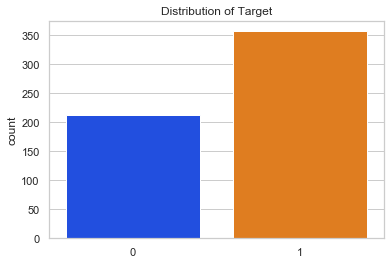

In [9]:
#--- Check the imbalance in Target

sns.countplot(x='target',data=cancer)
plt.title('Distribution of Target')  # 0: Malignant, 1: Benign

# ANN

In [10]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


tf.__version__
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

C:\Users\14698\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\14698\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\14698\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\14698\AppData\Local\Conti

'1.13.1'

In [11]:
#--- Examine the class label imbalance in numbers
df_y= pd.DataFrame(y, columns= ['Class'])
df = pd.concat([df_feat, df_y],axis=1)
#df.head()
neg, pos = np.bincount(df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 569
    Positive: 357 (62.74% of total)



In [12]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [13]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (455,)
Validation labels shape: (114,)
Test labels shape: (114,)
Training features shape: (455, 30)
Validation features shape: (114, 30)
Test features shape: (114, 30)


In [111]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')

      #keras.metrics.AUC(name='auc'),
]

Activation_f = ['relu']
import random 
random.seed(123)

def make_model(metrics = METRICS, output_bias=None, activation_f =Activation_f):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    for func in Activation_f:
        model = keras.Sequential([
        keras.layers.Dense(
            24, activation='relu',
            input_shape=(train_features.shape[-1],)),
        keras.layers.Dense(12, activation=func),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 24)                744       
_________________________________________________________________
dense_91 (Dense)             (None, 12)                300       
_________________________________________________________________
dropout_30 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 13        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [112]:
EPOCHS = 10 # since the dataset is relatively small
BATCH_SIZE = 20 

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [113]:
model.predict(train_features[:10])

array([[0.16247758],
       [0.20026499],
       [0.23212779],
       [0.1776388 ],
       [0.05780903],
       [0.22156948],
       [0.05192983],
       [0.13064954],
       [0.13234802],
       [0.1937464 ]], dtype=float32)

In [114]:
# (Optional) Set the correct initial bias.

In [115]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.1606


In [116]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.52114951])

In [107]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.58015835],
       [0.60198575],
       [0.5825392 ],
       [0.61605066],
       [0.57481515],
       [0.587456  ],
       [0.5670882 ],
       [0.62447715],
       [0.612754  ],
       [0.5996633 ]], dtype=float32)

In [117]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.1606


In [118]:
results2 = model2.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results2[0]))

model2 = make_model(output_bias = initial_bias)
model2.predict(train_features[:10])

Loss: 0.5784


array([[0.4838507 ],
       [0.5820335 ],
       [0.6442266 ],
       [0.49287915],
       [0.6329854 ],
       [0.64105785],
       [0.45011172],
       [0.49403253],
       [0.4594704 ],
       [0.65365547]], dtype=float32)

In [119]:
results = model2.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6210


In [120]:
# Checkpoint the initial weights
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)


Consider using a TensorFlow optimizer from `tf.train`.


In [121]:
# Confirm that the bias fix helps
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

<tf.Variable 'AssignVariableOp_97' shape=(1,) dtype=float32>

In [122]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [123]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

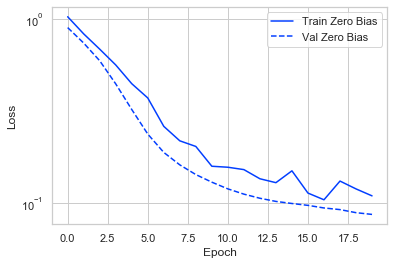

In [124]:
plot_loss(zero_bias_history, "Zero Bias", 0)

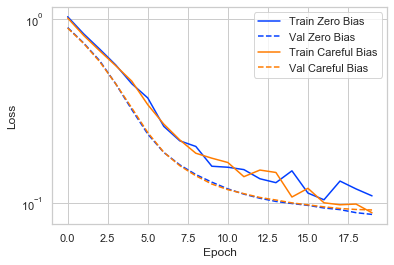

In [125]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [126]:
Activation_f = ['tanh']
model2 = make_model()
model2.load_weights(initial_weights)
model2.layers[-1].bias.assign([0.0])
zero_bias_history = model2.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

model2.summary()

<tf.Variable 'AssignVariableOp_110' shape=(1,) dtype=float32>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 24)                744       
_________________________________________________________________
dense_103 (Dense)            (None, 12)                300       
_________________________________________________________________
dropout_34 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 13        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


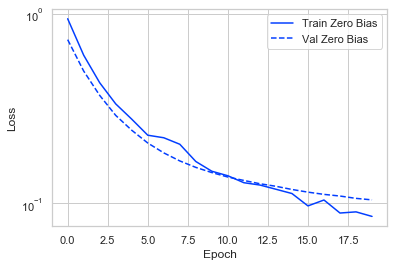

In [127]:
plot_loss(zero_bias_history, "Zero Bias", 0)

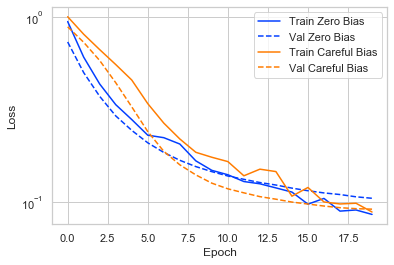

In [128]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [129]:
Activation_f = ['softmax']
model3 = make_model()
model3.load_weights(initial_weights)
model3.layers[-1].bias.assign([0.0])
zero_bias_history = model3.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)
model.summary()

<tf.Variable 'AssignVariableOp_117' shape=(1,) dtype=float32>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 24)                744       
_________________________________________________________________
dense_100 (Dense)            (None, 12)                300       
_________________________________________________________________
dropout_33 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 13        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


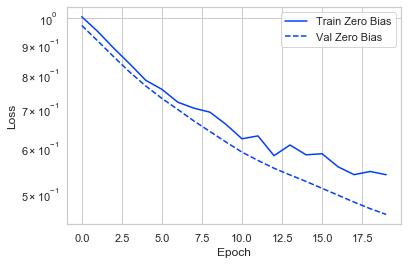

In [130]:
plot_loss(zero_bias_history, "Zero Bias", 0)

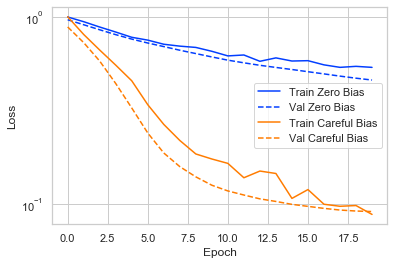

In [131]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [132]:
# Train Model 
Activation_f = ['tanh']
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Train on 455 samples, validate on 114 samples
Epoch 1/10
455/455 [==============================] - 1s 3ms/sample - loss: 0.9416 - tp: 28.0000 - fp: 7.0000 - tn: 162.0000 - fn: 258.0000 - accuracy: 0.4176 - precision: 0.8000 - recall: 0.0979 - val_loss: 0.7372 - val_tp: 6.0000 - val_fp: 0.0000e+00 - val_tn: 43.0000 - val_fn: 65.0000 - val_accuracy: 0.4298 - val_precision: 1.0000 - val_recall: 0.0845
Epoch 2/10
455/455 [==============================] - 0s 184us/sample - loss: 0.6137 - tp: 126.0000 - fp: 6.0000 - tn: 163.0000 - fn: 160.0000 - accuracy: 0.6352 - precision: 0.9545 - recall: 0.4406 - val_loss: 0.5001 - val_tp: 47.0000 - val_fp: 2.0000 - val_tn: 41.0000 - val_fn: 24.0000 - val_accuracy: 0.7719 - val_precision: 0.9592 - val_recall: 0.6620
Epoch 3/10
455/455 [==============================] - 0s 197us/sample - loss: 0.4404 - tp: 196.0000 - fp: 8.0000 - tn: 161.0000 - fn: 90.0000 - accuracy: 0.7846 - precision: 0.9608 - recall: 0.6853 - val_loss: 0.3721 - val_tp: 60.0000 - val

<Figure size 1080x720 with 0 Axes>

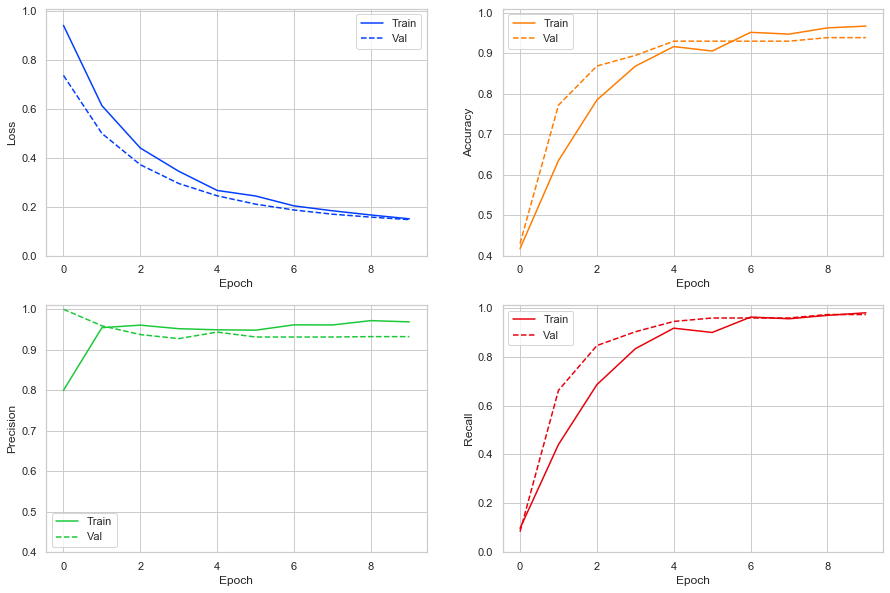

In [140]:
# Check triaining history

def plot_metrics(history):
    metrics =  ['loss', 'accuracy', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[n], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
            color=colors[n], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0.0,1.01]) #plt.ylim()[2]
        elif metric == 'accuracy':
            plt.ylim([0.4,1.01])
        elif metric == 'recall':
            plt.ylim([0.0,1.01])
        else:
            plt.ylim([0.4,1.01])

        plt.legend()
plt.figure(figsize=(15,10))        
plot_metrics(baseline_history)

In [ ]:
def plot_search_results(grid, score):
 
    #--- Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']
    testset = np.array(score)
    
    
    #knn_testset = np.array(knn_ts_score)
    #poly_testset = np.array(poly_testset_score)
    #sigmoid_testset = np.array(sigmoid_testset_score)
    #dtree_testset = np.array(dtree_testset_score)
    #gb_testset = np.array(gb_testset_score)

    #--- Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid
    
    #--- Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    #fig = plot_figure(style_label='classic') #################
    fig.suptitle('Scores vs. Parameters')
    ax[0].set_ylabel('Sensitivity')
    #fig.text(0.04, 0.5, 'Recall', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_train[best_index])
        e_1 = np.array(stds_train[best_index])
        y_2 = np.array(means_test[best_index])
        e_2 = np.array(stds_test[best_index])
        y_3 = np.array(testset[best_index])
        
        ax[i].set_xlabel(p.upper())
        ax[i].plot(x,y_1,color="#0abab5", label='Train Score',linestyle='--',marker ='o')
        ax[i].plot(x,y_2,color="#EE82EE", label='5fold-Cross-validation Score',linestyle='--',marker ='o')
        ax[i].plot(x,y_3,color='b', label='Test Score',linestyle='-',marker ='^')
        ax[i].fill_between(x, y_1-e_1,y_1+e_1,alpha=0.1,
                     color="#0abab5")
        ax[i].fill_between(x, y_2-e_2,y_2+e_2,alpha=0.1,
                     color="#EE82EE")
        ax[i].legend()

    plt.show()


    
plot_search_results(grid_knn, knn_ts_score)

In [141]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [151]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Breast Cancer Detected (True Posatives): ', cm[0][0])
    print('Breast Cancer Missed (False Negatives): ', cm[0][1])
    print('Breast Cancer Incorrectlys Detected (False Negatives): ', cm[1][0])
    print('Breast Cancer Correctly Not Detected (True Positives): ', cm[1][1])
    print('Total Observations: ', np.sum(cm[1]))
    print('Real Recall: ', cm[0][0]/ (cm[0][0] + cm[0][1]))
    print('*** 0 is the malignant, so confusion matrix and the Detection/Errors are opposite. ****')

loss :  0.13438389672521958
tp :  64.0
fp :  3.0
tn :  45.0
fn :  2.0
accuracy :  0.95614034
precision :  0.95522386
recall :  0.969697

Breast Cancer Detected (True Posatives):  45
Breast Cancer Missed (False Negatives):  3
Breast Cancer Incorrectlys Detected (False Negatives):  2
Breast Cancer Correctly Not Detected (True Positives):  64
Total Observations:  66
Real Recall:  0.9375
*** 0 is the malignant, so confusion matrix and the Detection/Errors are opposite. ****


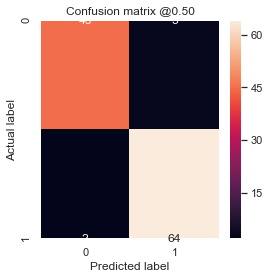

In [152]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [155]:
def plot_roc(name, labels, predictions, **kwargs):
    fn, tn, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fn, 100*tn, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,100])
    plt.ylim([0,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

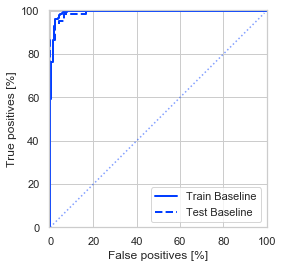

In [156]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.plot(np.arange(100),np.arange(100),ls=':',alpha=0.5) # x=y
plt.legend(loc='lower right')

In [157]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.34
Weight for class 1: 0.80


In [158]:
Activation_f = ['tanh']
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Train on 455 samples, validate on 114 samples
Epoch 1/10
455/455 [==============================] - 1s 3ms/sample - loss: 0.8032 - tp: 23.0000 - fp: 5.0000 - tn: 164.0000 - fn: 263.0000 - accuracy: 0.4110 - precision: 0.8214 - recall: 0.0804 - val_loss: 0.7519 - val_tp: 5.0000 - val_fp: 0.0000e+00 - val_tn: 43.0000 - val_fn: 66.0000 - val_accuracy: 0.4211 - val_precision: 1.0000 - val_recall: 0.0704
Epoch 2/10
455/455 [==============================] - 0s 193us/sample - loss: 0.5314 - tp: 120.0000 - fp: 6.0000 - tn: 163.0000 - fn: 166.0000 - accuracy: 0.6220 - precision: 0.9524 - recall: 0.4196 - val_loss: 0.5069 - val_tp: 44.0000 - val_fp: 0.0000e+00 - val_tn: 43.0000 - val_fn: 27.0000 - val_accuracy: 0.7632 - val_precision: 1.0000 - val_recall: 0.6197
Epoch 3/10
455/455 [==============================] - 0s 182us/sample - loss: 0.3917 - tp: 191.0000 - fp: 7.0000 - tn: 162.0000 - fn: 95.0000 - accuracy: 0.7758 - precision: 0.9646 - recall: 0.6678 - val_loss: 0.3747 - val_tp: 57.0000 -

<Figure size 1080x720 with 0 Axes>

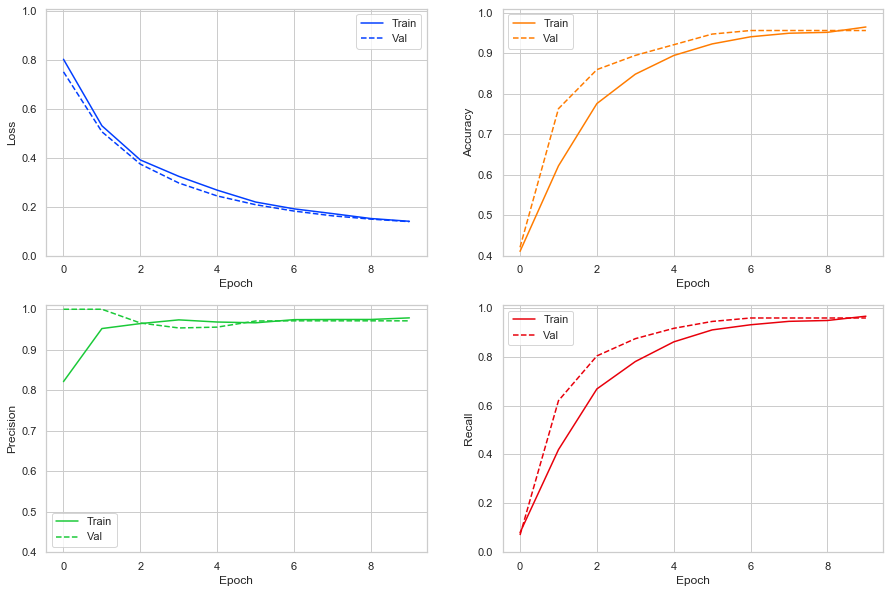

In [160]:
plt.figure(figsize=(15,10))     
plot_metrics(weighted_history)

In [162]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.1268022134900093
tp :  63.0
fp :  2.0
tn :  46.0
fn :  3.0
accuracy :  0.95614034
precision :  0.9692308
recall :  0.95454544

Breast Cancer Detected (True Posatives):  46
Breast Cancer Missed (False Negatives):  2
Breast Cancer Incorrectlys Detected (False Negatives):  3
Breast Cancer Correctly Not Detected (True Positives):  63
Total Observations:  66
Real Recall:  0.9583333333333334
*** 0 is the malignant, so confusion matrix and the Detection/Errors are opposite. ****


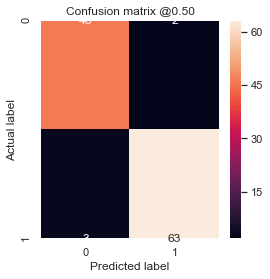

In [163]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

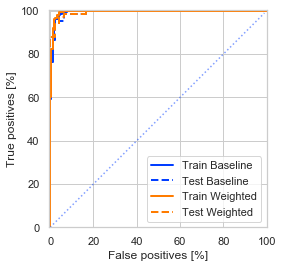

In [164]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plt.plot(np.arange(100),np.arange(100),ls=':',alpha=0.5) # x=y
plt.legend(loc='lower right')

# KNN

In [17]:
#--- Scale our data: For KNN, it is better to scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feat)
scaled_features = scaler.transform(df_feat)
scaled_features

StandardScaler(copy=True, with_mean=True, with_std=True)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [18]:
#--- Put Scaled feature in a data frame
df_feat = pd.DataFrame(scaled_features, columns=df_feat.columns)
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [19]:
#--- Split Data: Train and Test data set

from sklearn.model_selection import train_test_split

X = df_feat #X = scaled_features
#y = cancer['target']  -> We already assigned our TARGET to variable 'y'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
#--- KNN
#--- set k and find a class 
random.seed(1)
# number of class: According to our problem, we have 2 classes (binary case)
k = 2 
from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
#                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
#knn.get_params()
knn.get_params()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [21]:
pred_tr = knn.predict(X_train)

In [22]:
# predict our Target for the test set
pred = knn.predict(X_test)
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [23]:
# Evaluate our result
print('Scores without Cross Validation\n')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
print('<< Train Errror >>')
print('< Confusion Matrix >')
print(confusion_matrix(y_train, pred_tr))
print('\n< Classification Report >')
print(classification_report(y_train, pred_tr))

accuracy = accuracy_score(y_train, pred_tr)
#recall = recall_score(y_train, pred_tr) # not using it because our focused target is 0 not 1
cm = confusion_matrix(y_train, pred_tr)
recall = cm[0,0]/(cm[0,0]+cm[0,1])
#precision = precision_score(y_train, pred_tr) # not using it because of the same reason above
precision = cm[0,0]/(cm[0,0]+cm[1,0])

print('- Accuracy: {:.2f} \n- Recall: {:.2f}   (=Sensitivity)\n- Precision: {:.2f}'.format(accuracy, recall, precision))
print('\n-----------------------------------------------------------------\n')
print('<<Test error>>')

print('< Confusion Matrix >')
print(confusion_matrix(y_test, pred))
print('\n< Classification Report >')
print(classification_report(y_test, pred))

accuracy = accuracy_score(y_test, pred)
cm1 = confusion_matrix(y_test, pred)
recall = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#precision = precision_score(y_test, pred) # not using it because of the same reason above
precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
#precision = precision_score(y_test, pred)
print('- Accuracy: {:.2f} \n- Recall: {:.2f}   (=Sensitivity)\n- Precision: {:.2f}'.format(accuracy, recall, precision))


Scores without Cross Validation

<< Train Errror >>
< Confusion Matrix >
[[149   0]
 [ 11 238]]

< Classification Report >
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       149
           1       1.00      0.96      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.98      0.97       398
weighted avg       0.97      0.97      0.97       398

- Accuracy: 0.97 
- Recall: 1.00   (=Sensitivity)
- Precision: 0.93

-----------------------------------------------------------------

<<Test error>>
< Confusion Matrix >
[[ 61   2]
 [  3 105]]

< Classification Report >
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

-

## Experiment - Grid Search & Cross Validation

In [24]:
#--- Crossvalidation & Grid Search

from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import GridSearchCV

param_grid = {'algorithm': ['ball_tree', 'kd_tree', 'brute'], 
              'metric':['euclidean','manhattan', 'chebyshev', 'minkowski']}
# metrics: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
estimator = KNeighborsClassifier(n_neighbors=2)

# k = 5
grid_knn = GridSearchCV(estimator, param_grid, cv=5, verbose=3, return_train_score=True)
grid_knn.fit(X_train, y_train)
grid_knn.cv_results_
sorted(grid_knn.cv_results_.keys())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] algorithm=ball_tree, metric=euclidean ...........................
[CV]  algorithm=ball_tree, metric=euclidean, score=(train=0.984, test=0.912), total=   0.0s
[CV] algorithm=ball_tree, metric=euclidean ...........................
[CV]  algorithm=ball_tree, metric=euclidean, score=(train=0.981, test=0.925), total=   0.0s
[CV] algorithm=ball_tree, metric=euclidean ...........................
[CV]  algorithm=ball_tree, metric=euclidean, score=(train=0.965, test=0.988), total=   0.0s
[CV] algorithm=ball_tree, metric=euclidean ...........................
[CV]  algorithm=ball_tree, metric=euclidean, score=(train=0.975, test=0.925), total=   0.0s
[CV] algorithm=ball_tree, metric=euclidean ...........................
[CV]  algorithm=ball_tree, metric=euclidean, score=(train=0.978, test=0.987), total=   0.0s
[CV] algorithm=ball_tree, metric=manhattan ...........................
[CV]  algorithm=ball_tree, metric=manhattan, score=(t

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, metric=chebyshev, score=(train=0.956, test=0.975), total=   0.0s
[CV] algorithm=ball_tree, metric=chebyshev ...........................
[CV]  algorithm=ball_tree, metric=chebyshev, score=(train=0.962, test=0.900), total=   0.0s
[CV] algorithm=ball_tree, metric=chebyshev ...........................
[CV]  algorithm=ball_tree, metric=chebyshev, score=(train=0.969, test=0.936), total=   0.0s
[CV] algorithm=ball_tree, metric=minkowski ...........................
[CV]  algorithm=ball_tree, metric=minkowski, score=(train=0.984, test=0.912), total=   0.0s
[CV] algorithm=ball_tree, metric=minkowski ...........................
[CV]  algorithm=ball_tree, metric=minkowski, score=(train=0.981, test=0.925), total=   0.0s
[CV] algorithm=ball_tree, metric=minkowski ...........................
[CV]  algorithm=ball_tree, metric=minkowski, score=(train=0.965, test=0.988), total=   0.0s
[CV] algorithm=ball_tree, metric=minkowski ...........................
[CV]  algorithm=ball_t

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\14698\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=2, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=3)

{'mean_fit_time': array([0.00218005, 0.00118933, 0.00139546, 0.00159612, 0.00139499,
        0.00179305, 0.00139136, 0.00139589, 0.00099545, 0.00118413,
        0.00138931, 0.00119691]),
 'std_fit_time': array([3.80314490e-04, 3.81953189e-04, 4.88630836e-04, 4.87860777e-04,
        4.86896459e-04, 4.02168049e-04, 4.87843738e-04, 4.91709969e-04,
        3.96492319e-06, 3.89399675e-04, 4.79943988e-04, 3.99208097e-04]),
 'mean_score_time': array([0.00338454, 0.00320225, 0.00418792, 0.00319185, 0.00319014,
        0.00320177, 0.00359626, 0.00378208, 0.0037807 , 0.00300474,
        0.00538554, 0.00279236]),
 'std_score_time': array([4.92640645e-04, 3.93913453e-04, 4.00111630e-04, 3.99999295e-04,
        3.98129119e-04, 3.97919491e-04, 4.87667691e-04, 3.88178760e-04,
        7.31931596e-04, 1.61079234e-05, 1.49254015e-03, 3.98993617e-04]),
 'param_algorithm': masked_array(data=['ball_tree', 'ball_tree', 'ball_tree', 'ball_tree',
                    'kd_tree', 'kd_tree', 'kd_tree', 'kd_tree',

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_algorithm',
 'param_metric',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [25]:
grid_knn.cv_results_['params']

[{'algorithm': 'ball_tree', 'metric': 'euclidean'},
 {'algorithm': 'ball_tree', 'metric': 'manhattan'},
 {'algorithm': 'ball_tree', 'metric': 'chebyshev'},
 {'algorithm': 'ball_tree', 'metric': 'minkowski'},
 {'algorithm': 'kd_tree', 'metric': 'euclidean'},
 {'algorithm': 'kd_tree', 'metric': 'manhattan'},
 {'algorithm': 'kd_tree', 'metric': 'chebyshev'},
 {'algorithm': 'kd_tree', 'metric': 'minkowski'},
 {'algorithm': 'brute', 'metric': 'euclidean'},
 {'algorithm': 'brute', 'metric': 'manhattan'},
 {'algorithm': 'brute', 'metric': 'chebyshev'},
 {'algorithm': 'brute', 'metric': 'minkowski'}]

In [26]:
grid_knn.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [27]:
#--- Predict with the best estimator after Grid Search and Cross validation
pred_knn_tr=grid_knn.best_estimator_.predict(X_train)
pred_knn_ts=grid_knn.best_estimator_.predict(X_test)

In [28]:
# Results for Train Set

print(confusion_matrix(y_train, pred_knn_tr))
print(classification_report(y_train, pred_knn_tr))

accuracy = accuracy_score(y_train,  pred_knn_tr)
#recall = recall_score(y_train, pred_tr) # not using it because our focused target is 0 not 1
cm = confusion_matrix(y_train,  pred_knn_tr)
recall = cm[0,0]/(cm[0,0]+cm[0,1])
#precision = precision_score(y_train, pred_tr) # not using it because of the same reason above
precision = cm[0,0]/(cm[0,0]+cm[1,0])

print('- Accuracy: {:.2f} \n- Recall: {:.2f}   (=Sensitivity)\n- Precision: {:.2f}'.format(accuracy, recall, precision))

[[149   0]
 [ 11 238]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       149
           1       1.00      0.96      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.98      0.97       398
weighted avg       0.97      0.97      0.97       398

- Accuracy: 0.97 
- Recall: 1.00   (=Sensitivity)
- Precision: 0.93


In [161]:
# Results for Test Set

print(confusion_matrix(y_test, pred_knn_ts))
print(classification_report(y_test, pred_knn_ts))

accuracy = accuracy_score(y_test, pred_knn_ts)
cm1 = confusion_matrix(y_test, pred_knn_ts)
recall = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#precision = precision_score(y_test, pred) # not using it because of the same reason above
precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
#precision = precision_score(y_test, pred)
print('- Accuracy: {:.2f} \n- Recall: {:.2f}   (=Sensitivity)\n- Precision: {:.2f}'.format(accuracy, recall, precision))


[[ 60   3]
 [  5 103]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        63
           1       0.97      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

- Accuracy: 0.95 
- Recall: 0.95   (=Sensitivity)
- Precision: 0.92


In [31]:
knn_ts_score =[]

for i in range(len(grid_knn.cv_results_['params'])):
    paramtrs = grid_knn.cv_results_['params'][i]
    knn = KNeighborsClassifier(n_neighbors=2, algorithm = paramtrs['algorithm'], metric = paramtrs['metric'])
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    cm1 = confusion_matrix(y_test, pred)
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    knn_ts_score.append(recall)
    
knn_ts_score

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

[0.9722222222222222,
 0.9537037037037037,
 0.8981481481481481,
 0.9722222222222222,
 0.9722222222222222,
 0.9537037037037037,
 0.8981481481481481,
 0.9722222222222222,
 0.9722222222222222,
 0.9537037037037037,
 0.8981481481481481,
 0.9722222222222222]

<module 'matplotlib.pyplot' from 'C:\\Users\\14698\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

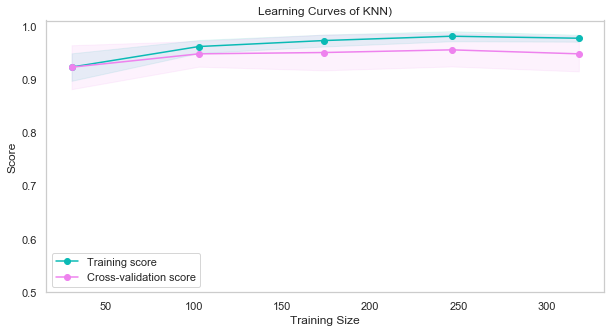

In [50]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize=(10,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#0abab5")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#EE82EE")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#0abab5",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#EE82EE",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#--- Plotting
cv = 5      # number of folds
n_jobs = -1

X, y = X_train, y_train

title = r"Learning Curves of KNN)"
knn = KNeighborsClassifier(n_neighbors=2)
estimator = knn

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=n_jobs)

plt.show()

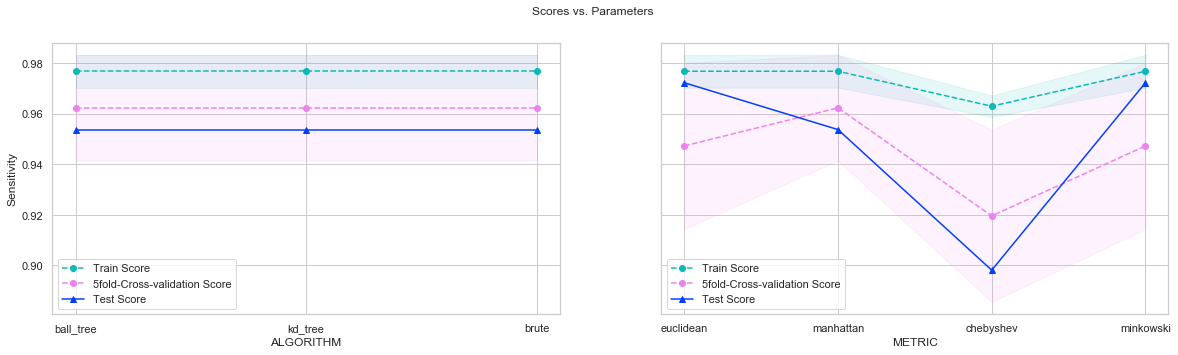

In [32]:
def plot_search_results(grid, score):
 
    #--- Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']
    testset = np.array(score)
    
    
    #knn_testset = np.array(knn_ts_score)
    #poly_testset = np.array(poly_testset_score)
    #sigmoid_testset = np.array(sigmoid_testset_score)
    #dtree_testset = np.array(dtree_testset_score)
    #gb_testset = np.array(gb_testset_score)

    #--- Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid
    
    #--- Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    #fig = plot_figure(style_label='classic') #################
    fig.suptitle('Scores vs. Parameters')
    ax[0].set_ylabel('Sensitivity')
    #fig.text(0.04, 0.5, 'Recall', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_train[best_index])
        e_1 = np.array(stds_train[best_index])
        y_2 = np.array(means_test[best_index])
        e_2 = np.array(stds_test[best_index])
        y_3 = np.array(testset[best_index])
        
        ax[i].set_xlabel(p.upper())
        ax[i].plot(x,y_1,color="#0abab5", label='Train Score',linestyle='--',marker ='o')
        ax[i].plot(x,y_2,color="#EE82EE", label='5fold-Cross-validation Score',linestyle='--',marker ='o')
        ax[i].plot(x,y_3,color='b', label='Test Score',linestyle='-',marker ='^')
        ax[i].fill_between(x, y_1-e_1,y_1+e_1,alpha=0.1,
                     color="#0abab5")
        ax[i].fill_between(x, y_2-e_2,y_2+e_2,alpha=0.1,
                     color="#EE82EE")
        ax[i].legend()

    plt.show()


    
plot_search_results(grid_knn, knn_ts_score)

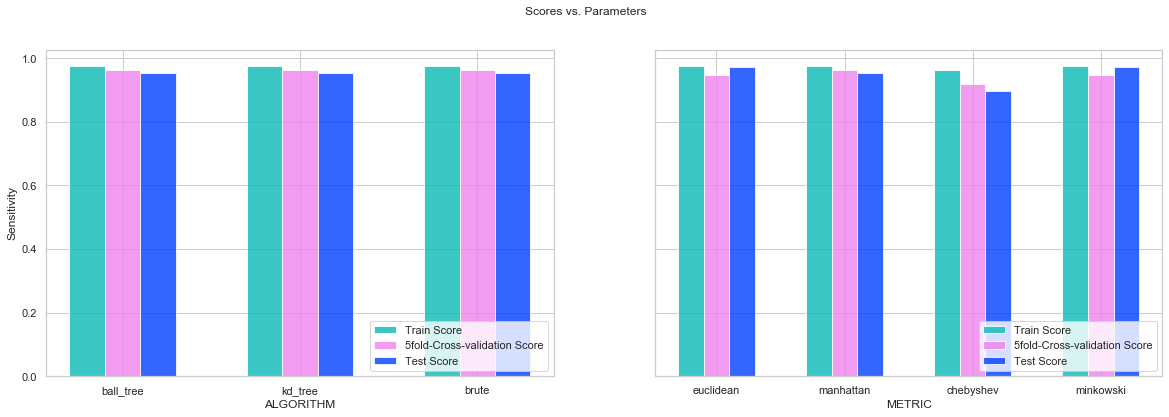

In [33]:
def plot_search_results(grid, score):
 
    #--- Results from grid search
    results = grid.cv_results_
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    testset = np.array(score)
    
    
    #knn_testset = np.array(knn_ts_score)
    #poly_testset = np.array(poly_testset_score)
    #sigmoid_testset = np.array(sigmoid_testset_score)
    #dtree_testset = np.array(dtree_testset_score)
    #gb_testset = np.array(gb_testset_score)

    #--- Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid
    
    #--- Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,6))
    #fig = plot_figure(style_label='classic') #################
    fig.suptitle('Scores vs. Parameters')
    ax[0].set_ylabel('Sensitivity')
    #fig.text(0.04, 0.5, 'Recall', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        #x = np.array(params[p])
        x = np.arange(len(np.array(params[p])))
        
        y_1 = np.array(means_train[best_index])
        e_1 = np.array(stds_train[best_index])
        y_2 = np.array(means_test[best_index])
        e_2 = np.array(stds_test[best_index])
        y_3 = np.array(testset[best_index])
        
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(params[p])
        al, w = 0.8, 0.2
        ax[i].set_xlabel(p.upper())
        ax[i].bar(x-w,y_1,color="#0abab5", label='Train Score', alpha=al, width=w)
        ax[i].bar(x,y_2,color="#EE82EE", label='5fold-Cross-validation Score', alpha=al, width=w)
        ax[i].bar(x+w,y_3,color='b', label='Test Score', alpha=al, width=w)
        #ax[i].fill_between(x, y_1-e_1,y_1+e_1,alpha=0.1,color="#0abab5")
        #ax[i].fill_between(x, y_2-e_2,y_2+e_2,alpha=0.1,color="#EE82EE")
        ax[i].legend(loc='lower right')

    plt.show()


    
plot_search_results(grid_knn, knn_ts_score)

In [35]:
results = grid_knn.cv_results_
means_train = results['mean_train_score']
means_train
grid_knn.best_params_.keys()
grid_knn.best_params_['algorithm']
grid_knn.best_params_['metric']

array([0.97675708, 0.97675708, 0.96293239, 0.97675708, 0.97675708,
       0.97675708, 0.96293239, 0.97675708, 0.97675708, 0.97675708,
       0.96293239, 0.97675708])

dict_keys(['algorithm', 'metric'])

'ball_tree'

'manhattan'

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs K Value(the number of Nodes)')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

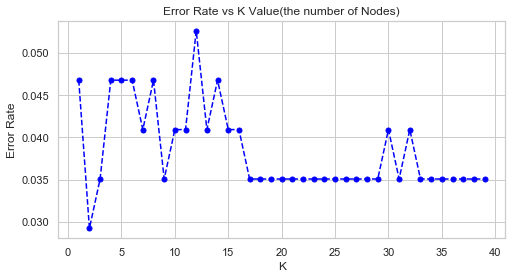

In [39]:
# elbow method to choose better K value
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(8,4))
plt.plot(range(1,40), error_rate, color='blue', ls= 'dashed',marker='o', markersize=5)
plt.title('Error Rate vs K Value(the number of Nodes)')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [ ]:


def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
